In [42]:
# writing all of the visualization functions inside of here
# NOTE: not visualization of the models, just general visualizations
# of the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# import randomcolor

In [43]:
# load the data

CLEAN_DATAFILE = "BDP_CLEAN.csv"
df = pd.read_csv(CLEAN_DATAFILE)

In [44]:
# function to visualize rating breakdown by industry

def industry_ratings(df, industry, graph=True):
    '''
    takes in the dataframe and industry type
    will create visual on the rating breakdown within that industry
    if you set graph to False it will not graph it and will only
    return the dictionary of values
    '''
    ratings = {}
    for index, row in df.iterrows():
        if row['GICS_INDUSTRY_NAME'] == industry:
            rating = row['RTG_SP_LT_LC_ISSUER_CREDIT']
            if rating in ratings:
                ratings[rating] += 1
            else:
                ratings[rating] = 1
    
    # double check everything was done correctly
    # print(ratings)
    
    # graph the data
    if graph:
        sizes = []
        labels = []
        for k, v in ratings.items():
            sizes.append(v)
            labels.append(k)
        
        # cs=cm.Set1(np.arange(len(labels))/40.)
        # rand_color = randomcolor.RandomColor()
        # cs = rand_color.generate(count=len(labels))
        
        # patches, texts = plt.pie(sizes, colors = cs)
        patches, texts = plt.pie(sizes)
        plt.legend(patches, labels, loc="best")
        plt.axis('equal')
        plt.tight_layout()
        plt.title("Rating Breakdown for " + industry)
        plt.show()
    
    return ratings

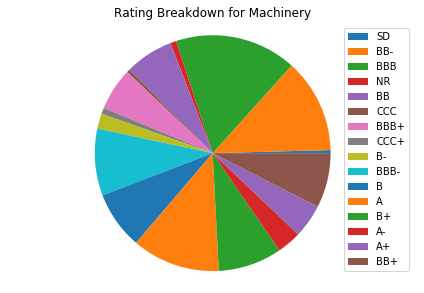

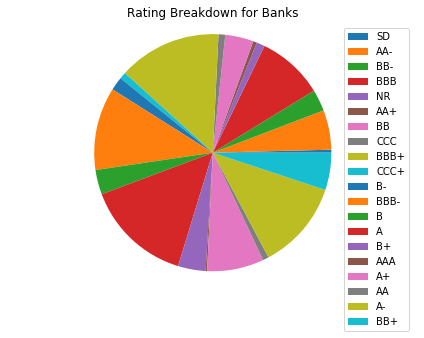

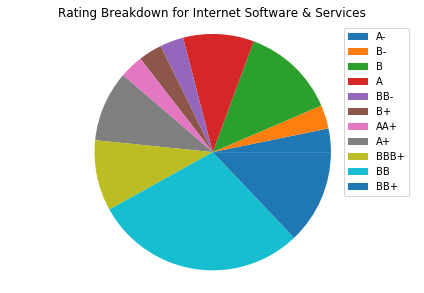

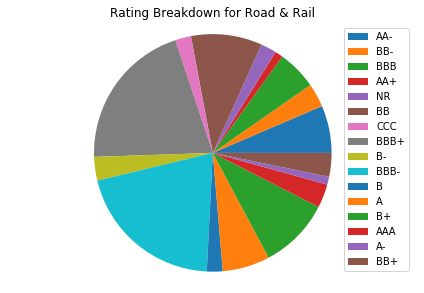

In [45]:
# example of running the function
# change the industry name to look at different graphs

ir = industry_ratings(df, "Machinery")
ir = industry_ratings(df, "Banks")
ir = industry_ratings(df, "Internet Software & Services")
ir = industry_ratings(df, "Road & Rail")

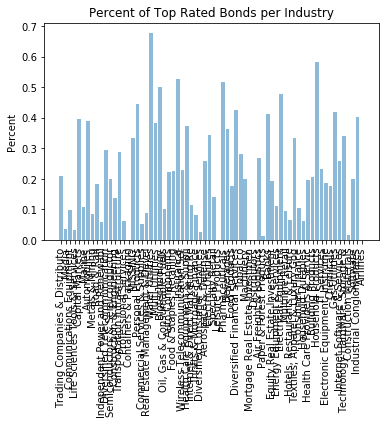

In [46]:
# now I want to see a bar graph comparing all of the
# industries and the percent of ratings in each industry
# that is very high i.e. anything in the A range

industries = {}
for index, row in df.iterrows():
    industry = row['GICS_INDUSTRY_NAME']
    if industry == '':
        pass
    elif industry in industries:
        industries[industry][1] += 1
        if 'A' in row['RTG_SP_LT_LC_ISSUER_CREDIT']:
            industries[industry][0] += 1
    elif industry not in industries:
        industries[industry] = [0, 1]
        if 'A' in row['RTG_SP_LT_LC_ISSUER_CREDIT']:
            industries[industry][0] += 1
            
values = []
labels = []
for k, v in industries.items():
    labels.append(k)
    values.append(v[0] / v[1])

y_pos = np.arange(len(labels))
 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels, rotation='vertical')
plt.ylabel('Percent')
plt.title('Percent of Top Rated Bonds per Industry')
 
plt.show()